# Chapter 4, Part C : High Performance Pandas

In this section we will talk about two vital function:
eval() & query() functions are extremly essential to deal with big data. 


 ### 1) eval(), fucntion uses string expressions to efficiently compute operating DataFrames. 
       --> e.g., compute the sum of two data frames: pd.eval('df1+df2')
        

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns 

 #### Example: Performance time comparision

In [5]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows,ncols)) for i in range(4))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891
1,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876
2,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,...,0.030500,0.037348,0.822601,0.360191,0.127061,0.522243,0.769994,0.215821,0.622890,0.085347
3,0.051682,0.531355,0.540635,0.637430,0.726091,0.975852,0.516300,0.322956,0.795186,0.270832,...,0.990505,0.412618,0.372018,0.776413,0.340804,0.930757,0.858413,0.428994,0.750871,0.754543
4,0.103124,0.902553,0.505252,0.826457,0.320050,0.895523,0.389202,0.010838,0.905382,0.091287,...,0.455657,0.620133,0.277381,0.188121,0.463698,0.353352,0.583656,0.077735,0.974395,0.986211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.071979,0.439323,0.188588,0.586705,0.640611,0.662409,0.318503,0.600419,0.609742,0.390592,...,0.122887,0.491140,0.032855,0.567250,0.428673,0.421092,0.021024,0.398596,0.405897,0.869783
99996,0.313411,0.010490,0.469216,0.600825,0.451085,0.496918,0.983128,0.422056,0.719077,0.045588,...,0.072444,0.715574,0.300257,0.087290,0.130703,0.549202,0.287877,0.589258,0.516884,0.254370
99997,0.560873,0.647396,0.043068,0.282439,0.042950,0.346690,0.954034,0.603182,0.447768,0.888498,...,0.880079,0.508377,0.442052,0.621332,0.314942,0.131085,0.697310,0.111705,0.397560,0.988347
99998,0.710115,0.067999,0.611329,0.136199,0.054724,0.018160,0.911428,0.762005,0.245312,0.891027,...,0.249632,0.894231,0.342761,0.844330,0.659797,0.835561,0.117920,0.211202,0.931760,0.296913


In [7]:
    # Standard Pandas Approach:
df1 + df2 + df3 + df4

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.456085,2.240325,2.189299,2.796486,0.997756,1.857199,0.836188,1.993636,3.384643,1.851474,...,1.405156,1.972001,3.018147,2.220360,3.010689,1.747911,2.386533,1.733311,1.431434,1.987172
1,1.930732,1.325833,2.100320,1.031509,2.216550,2.322945,2.221711,2.551356,1.446013,1.150052,...,1.295991,1.298014,2.191522,1.514702,1.013891,2.682375,2.355956,1.905342,2.432560,1.438647
2,2.961585,1.241173,1.292687,1.559529,3.244460,1.727601,1.508593,2.373529,1.092988,1.932929,...,1.857067,2.436111,2.279347,2.240607,2.450652,1.527546,2.098585,1.540268,1.685716,1.544752
3,1.325278,2.311100,3.153195,2.428513,2.468706,2.168389,1.036675,2.543273,1.985104,1.664177,...,2.248197,2.597650,1.624677,1.896175,1.075806,2.305705,3.019780,1.157161,3.050878,2.029253
4,1.107165,1.998018,2.171741,3.011473,2.403474,1.785172,1.148053,0.842213,3.165272,1.333032,...,2.001123,2.899136,1.595563,2.134547,2.112748,2.100429,2.224902,0.643061,2.949058,3.143277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.948321,1.751224,2.276621,2.203974,2.752196,1.811677,1.544824,1.347874,2.406432,2.045719,...,2.156290,1.469662,1.239475,2.085855,1.546402,2.670792,0.801108,1.924963,1.309836,2.598576
99996,2.249443,2.248954,2.840738,2.278969,1.552147,1.613808,2.537029,2.572771,1.855158,1.570820,...,1.528213,1.484577,1.659783,1.798531,1.920396,3.043902,1.965024,1.725764,1.465961,1.805480
99997,1.942065,2.352778,1.104218,1.777017,2.159435,1.715014,2.424385,2.013074,1.637694,3.488990,...,2.159156,2.096489,1.486934,2.669343,2.069421,1.332025,2.191244,2.179376,1.816149,1.682464
99998,2.681177,0.958664,2.867072,1.127300,1.277971,1.268119,1.756763,2.250528,1.326825,2.479023,...,1.608354,2.040729,2.223907,3.272577,1.933145,2.578746,1.132848,1.919029,2.201389,1.950606


In [16]:
 # It is way faster (50% faster) with eval() than normal:
%timeit pd.eval('df1 + df2 + df3 + df4')

20.2 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 2) DataFrame.query() Method
        # DataFrame has another method based on evaluated strings: query()
            #--> for expressions involving columns of a DataFrame (often easier to read and understand)
        # query() method also accepts the @ flag to mark local variables

#### Example: Standard pandas vs query ()

In [17]:
rng = np.random.RandomState(42)
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C']) 
result1 = df[(df.A < 0.5) & (df.B < 0.5)]  #standard pandas syntax 
result2 = df.query('A < 0.5 and B < 0.5')  #easier to understand 

In [18]:
print(np.allclose(result1, result2)) 

True


In [19]:
np.allclose(result1, result2)

True

#### Example: using local variable Cmean

In [24]:
Cmean = df['C'].mean() #mean value of column C

result3 = df[(df.A < Cmean) & (df.B < Cmean)]
result4 = df.query('A < @Cmean and B < @Cmean')
result3

,A,B,C
5,0.183405,0.304242,0.524756
6,0.431945,0.291229,0.611853
7,0.139494,0.292145,0.366362
12,0.304614,0.097672,0.684233
13,0.440152,0.122038,0.495177
...,...,...,...
970,0.230417,0.001474,0.729345
973,0.302931,0.325295,0.712621
987,0.345342,0.335610,0.978525
990,0.380518,0.163035,0.786206


In [25]:
result4

,A,B,C
5,0.183405,0.304242,0.524756
6,0.431945,0.291229,0.611853
7,0.139494,0.292145,0.366362
12,0.304614,0.097672,0.684233
13,0.440152,0.122038,0.495177
...,...,...,...
970,0.230417,0.001474,0.729345
973,0.302931,0.325295,0.712621
987,0.345342,0.335610,0.978525
990,0.380518,0.163035,0.786206


In [26]:
  #Let us check it out whether they are identical or not? \
print(np.allclose(result3, result4)) #It is true!

True


 ### Performance : when to use these two commands? 
        
            # Two considerations for using eval() and query(): computation time and memory use.
            # memory use is most predictable aspect: every compound expression involving NumPy arrays
            #or Pandas DataFrames will result in implicit creation of temporary arrays
                #▪ expression x = df[(df.A < 0.5) & (df.B < 0.5)] is roughly equivalent to this:
                        #tmp1 = df.A < 0.5 
                        #tmp2 = df.B < 0.5 
                        #tmp3 = tmp1 & tmp2 
                        #x = df[tmp3]

## Time Series

### Regardless of what is your subject, time series data is really essential for you. 
### Dates and Times in Python: 
    Pandas was developed in the context of financial modeling (extensive set of tools for working for dates, times, and time-indexed data).
    

#### Types of time data: 
        
      1) time stamps: particular monents in time ((e. g., July 4th, 2015, at 7:00 a.m.))
      2) time intervals and periods: length of time between a particular beginning and end point. 
           periods can be used a special case like uniform length and does not overlap (e.g., 24 hour-long periods constituting days)
      3) time deltas or durations: reference an EXACT length of time (e.g., a duration of 22.57 seconds)
   

### Example: Time Stamp

In [30]:
date = pd.to_datetime("4th of July, 2015"); date

# To learn the weekday of that specific date we use the strftime() function. 
print(date.strftime('%A')) # And it is Saturday
    # strftime() function is quite handy and it has a bunch of Format Codes (see slide page number 154)
    #to learn some specific info about in exact monent in time. 


# Idex data by timestamping: 
    #timestamps can be used to idex data 
        #--> allows for special slicing like printing all data from a given year. 

index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index); print(data)
#we can do some special things like to call some specific time periods: from there until there... 
print(data['2014-07-04' : '2015-07-04'])
#another one for only 2015: 
print(data['2015'])


Saturday
2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64
2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64
2015-07-04    2
2015-08-04    3
dtype: int64


### Fundemantal Pandas Time Series Data Structure 

        ▪ for time stamps, Pandas provides the Timestamp type (associated Index structure is DatetimeIndex)
        ▪ for time periods, Pandas provides the Period type (encodes a fixed-frequency interval; associated index structure is PeriodIndex)
        ▪ for time deltas or durations, Pandas provides the Timedelta type (associated index structure is TimedeltaIndex)

### Example

In [32]:
from datetime import datetime

In [33]:
# This is about time stamps
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', 
                        '2015-Jul-6', '07-07-2015', '20150708'])
print(dates)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


In [34]:
#we can also learn the time between two dates:
print(dates[2] - dates[0]) # Timedelta ('3 days 00:00:00')

3 days 00:00:00


In [35]:
# for the PeriodIndex: 
print(pd.period_range('2015-07', periods=8, freq='M'))

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')


## Frequencies and Offsets: 
    # Fundemantal to time series is the concept of frequencty of data offset desired frequency spacing can be specified by code: 
        --> by adding 'S' suffix to monthly, quarterly, and annual frequencies, they will be marked at the beginning of the period (instead of the end)
    for more detail and descriptions, see silde page number 158
    
### Resampling and converting frequencies
    ▪ common need for time series data: resampling at a higher or lower frequency 
        → methods resample() and asfreq()
    ▪ resample() is fundamentally resampling as data aggregation (e. g., average of the previous year)
    ▪ asfreq() is fundamentally resampling as data selection (e. g., value at the end of the year)



### Example: Google's closing price history (from Yahoo)

#### This is where I got stuck with importing seaborn package

In [36]:
from pandas_datareader import data

In [37]:
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')

In [39]:
# lets have a quick look!
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [40]:
# For simplicity we will only use the 'closing' price
goog = goog['Close']

In [46]:
goog

Date
2004-08-19     49.982655
2004-08-20     53.952770
2004-08-23     54.495735
2004-08-24     52.239197
2004-08-25     52.802086
                 ...    
2015-12-24    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Name: Close, Length: 2863, dtype: float64

### Visualizing Google's closing price history: resample( ) vs. asfreq( )

In [48]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

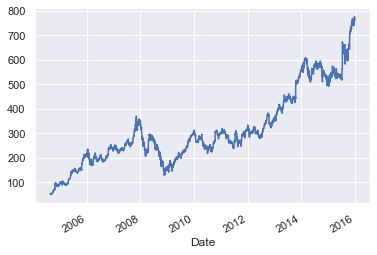

In [49]:
goog.plot()

In [50]:
# resampling (here: down-sampling) at the end of business year (donated as BA)

<AxesSubplot:xlabel='Date'>

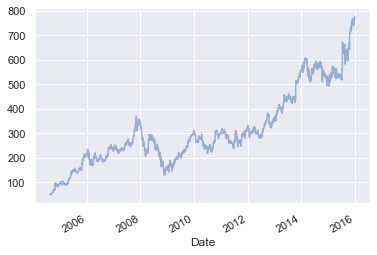

In [54]:
goog.plot(alpha=0.5, style='-')

<AxesSubplot:xlabel='Date'>

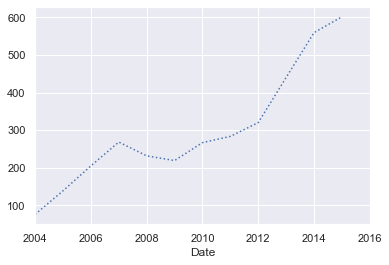

In [52]:
goog.resample('BA').mean().plot(style=':')

<AxesSubplot:xlabel='Date'>

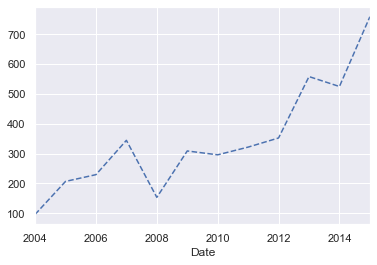

In [55]:
goog.asfreq('BA').plot(style='--')

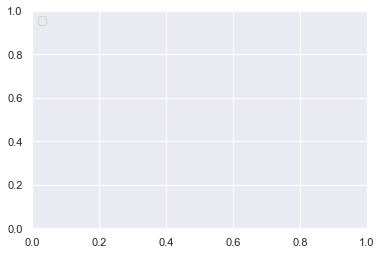

In [59]:
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');
plt.show() ##??? Shoul I write the codes all together?

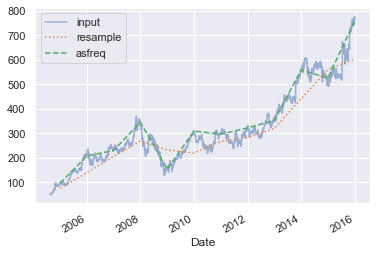

In [61]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');
plt.show()     ### Yes, now it worked out!

### Time-shifts: a quick overlook

#### Shifting data in time
    ▪ common time series-specific operation: shifting of data in time 
        → methods shift() and tshift()
        → shift is specified in multiples of the frequency
    ▪ shifts(), shifts the data
    ▪ tshifts(), shifts the index


#### Example: Shifting Google's closing price by 900 days (copied from slides)

    ▪ shift(900) shifts the data by 900 days, pushing some of it off the end of the graph (and leaving NA  values at the other end)
    ▪ tshift(900) shifts the index values by 900 days

<ipython-input-65-a1cbcea48f68>:9: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


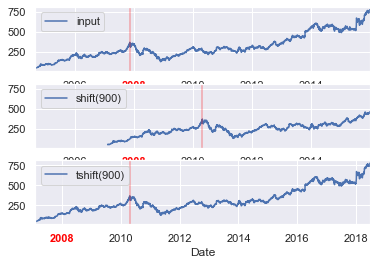

In [65]:
#### shift() and tshift() by 900 days


fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0]) 
goog.shift(900).plot(ax=ax[1]) 
goog.tshift(900).plot(ax=ax[2])



# legends and annotations
local_max = pd.to_datetime('2007-11-05') 
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2) 
ax[0].get_xticklabels()[2].set(weight='heavy', color='red') 
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2) 
ax[1].get_xticklabels()[2].set(weight='heavy', color='red') 
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2) 
ax[2].get_xticklabels()[1].set(weight='heavy', color='red') 
ax[2].axvline(local_max + offset, alpha=0.3, color='red');


### DONE